# <span style="color:red">  Esercitazione_05</span>

In [1]:
#Librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Informazioni utili:

- La cartella *<font color="blue">05.1</font>* contiene tutti i codici scritti per la realizzazione dell'esercitazione.
- Nella cartella *<font color="blue">Results</font>* sono già contenuti tutti i risultati di output. Questi ultimi sono quelli analizzati ed esposti in questo notebook e non è quindi necessaria la ricompilazione e la riesecuzione dei codici; nel caso si volessero rieffettuare le simulazioni è sufficiente digitare *"<font color="green">make run</font>"* da terminale. I codici sono strutturati in modo tale che una nuova compilazione vada automaticamente a sostituire i vecchi dati di output con quelli nuovi appena ottenuti.

## Esercizio 05.1

Con lo scopo di campionare  le densità di probablità $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$,  rappresentanti rispettivamente le le funzioni d'onda di ground state e dell'orbitale $2p$ dell'atomo di idrogeno, è stata costruita una classe (*<font color="grey">Metropolis.h, Metropolis.cpp</font>*) che permettesse di campionare le posizioni $(x,y,z)$ sfruttando l'algorirmo di Metropolis ($M(RT)^2$). 

L'algoritmo $M(RT)^2$ è stato implementando considerando come probabilità di transizione di prova $T(x|y)$ una distribuzione uniforme con ampiezza pari allo step considerato ed un gaussiana con varianza pari allo step considerato nel campionamento di entrambi gli orbitali. Siccome la distribuzione di probabilità campionata converge a quella desiderata solo dopo un tempo di equilibrazione, le simulazioni sono precedute da una fase di equilibrazione con un numero di passi pari a $10^3$. Nelle seguenti tabella sono riportati i parametri presi in considerazione durante le simulazioni.

- **Distribuzione uniforme**

| Parametro | Orbitale 1s | Orbitale 2p |
|-----------|-------------|-------------|
| Ampiezza step del Metropolis | $1.2$ | $2.95$      |
| Numero di steps del Metropolis | $10^6$ | $10^6$ |
| Posizione iniziale | $(1, 1, 1)$ | $(3, 3, 3)$ |

- **Distribuzione gaussiana**

| Parametro | Orbitale 1s | Orbitale 2p |
|-----------|-------------|-------------|
| Ampiezza step del Metropolis | $0.75$ | $1.85$      |
| Numero di steps del Metropolis | $10^6$ | $10^6$ |
| Posizione iniziale | $(1, 1, 1)$ | $(3, 3, 3)$ |

*N.B. Gli steps del Metropolis sono riportati in unità del raggio di Bohr.*

L'ampiezza dei passi del Metropolis è scelta cercando di rispettare la regola empirica del $50\%$, cioè questo parametro è stato impostato in modo tale da avere il numero di passi accettati il più possibile simile a quello dei passi rifiutati; in questo modo si evita alla stesso tempo sia un *bassa efficenza* dell'algoritmo proponendo mosse troppo "larghe" che possiedono basse probabilità di essere accettate e sia un *alta correlazione* tra i punti campionati scegliendo mosse troppo "strette" con un alta probabilità di essere accettate. Così facendo ci si assicura la validità del teorema del limite centrale nell'utilizzo del data blocking qualora si volessero utilizzare pochi dati per ogni blocco. Si riporta di seguito l' output prodotto dall'esecuzione del codice:


    ==========================================================
    ========================ORBITALE 1S=======================
    ==========================================================
    Distribuzione di trial uniforme...

    Accepted steps = 506265

    Refused steps = 493735

    ACCEPTANCE RATE: 50.6265%

    ----------------------------------------
    Distribuzione di trial gaussiana...
    
    Accepted steps = 504850

    Refused steps = 495150

    ACCEPTANCE RATE: 50.485%

    ----------------------------------------
    ==========================================================
    ========================ORBITALE 2P=======================
    ==========================================================
    Distribuzione di trial uniforme...

    Accepted steps = 503699

    Refused steps = 496301

    ACCEPTANCE RATE: 50.3699%

    ----------------------------------------
    Distribuzione di trial gaussiana...

    Accepted steps = 504802

    Refused steps = 495198

    ACCEPTANCE RATE: 50.4802%

    ----------------------------------------


Le posizioni iniziali dell'algoritmo invece sono state decise in modo tale da non essere in corrispondenza di un un punto con distribuzione di probabilità nulla. Se si scegliesse un punto con probabilità molto bassa l'algoritmo con buona probabilità si muoverebbe quasi sempre e questo porterebbe ad aumento degli steps necessari per l'equilibrazione.


Dalle simulazioni è stato possibile estrapolare le posizioni campionate con le quali si sono effettuati dei plot qui sotto riportati. Per comodità si riportano solo quelli ottenuti da una distribuzione di probabilità di transizione uniforme in quanto per il caso della gaussiana sono analoghi. (Qualora si fosse interessati a questi ultimi sono comunque presenti nella cartella *<font color="blue">Results</font>*). Si può notare qualitativamente il corretto campionamento del Metroplis poichè, come ci si aspetta, l'orbitale $1s$ presenta una forma sferica mentre quello $2p$ la forma costituita dai due lobi.

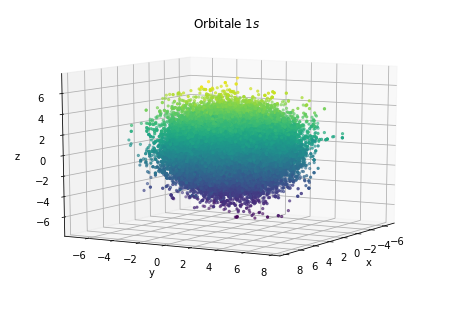

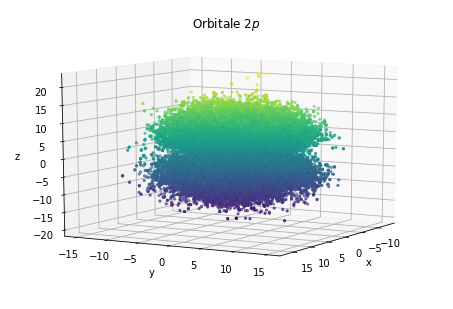

CPU times: user 2min 14s, sys: 4.14 s, total: 2min 19s
Wall time: 2min 15s


In [10]:
%%time #Tempo di esecuzione della cella
X,Y,Z= np.loadtxt('Results/position_1s_unif.out', usecols=(0,1,2), delimiter=' ', unpack='true')
X2,Y2,Z2= np.loadtxt('Results/position_2p_unif.out', usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Orbitale $1s$')
ax.view_init(10, 30)
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Orbitale $2p$')
ax.view_init(10, 30)
plt.show()

Successivamente sono stati ricavati i valori dei raggi $r_{i}$, cioè la distanza dall'origine, dei singoli campionamenti $r_{i}= \sqrt{ x_{i}^2 + y_{i}^2 + z_{i}^2}$ con i quali è stato valutato, attraverso il metodo del *data blocking*, il valor medio del raggio per entrami gli orbitali considerati $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e  $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. I valori teorici sono rispettivamente: 

$$\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Sono mostrati di seguito due grafici che riportano il valor medio del raggio (in unità del raggio di Bohr $a_{0}$) con i rispettivi errori per ognuno degli orbitali con entrambe le distribuzioni di trail in funzione degli step del Metropolis. Come si evince dai grafici i risultati ottenuti per entrambe le $T(x|y)$ sono compatibili con quelli attesi. 

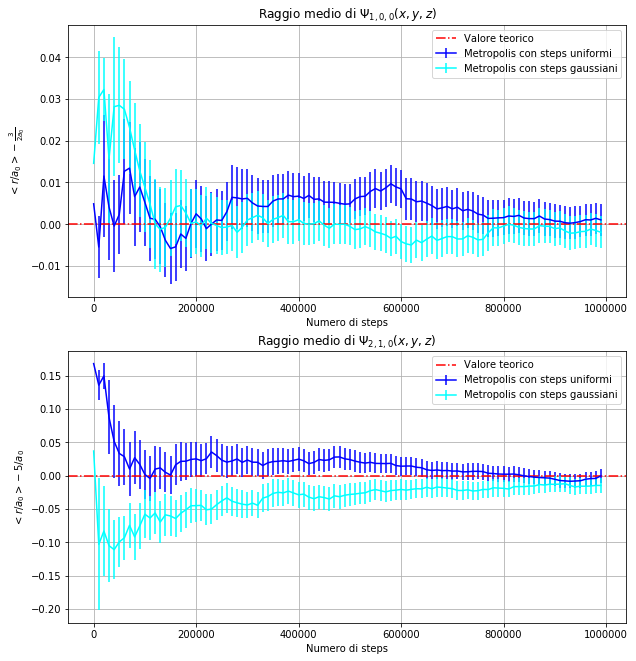

In [3]:
plt.figure(figsize=(10,11))

plt.subplot(2,1,1)
N, r, error = np.loadtxt('Results/rays_1s_unif.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.title(r"Raggio medio di $\Psi_{1,0,0}(x,y,z)$")
plt.axhline(y=0,linestyle='-.',color = 'red',label = 'Valore teorico')
plt.errorbar(N,r - 3./2.,yerr=error, label = 'Metropolis con steps uniformi', color = 'blue')
N, r, error = np.loadtxt('Results/rays_1s_gauss.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r - 3./2.,yerr=error, label = 'Metropolis con steps gaussiani', color = 'cyan')
plt.xlabel('Numero di steps')
plt.ylabel(r'$<r/a_{0}> - \frac{3}{2a_{0}}$')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
N, r, error = np.loadtxt('Results/rays_2p_unif.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.title(r"Raggio medio di $\Psi_{2,1,0}(x,y,z)$ ")
plt.axhline(y=0,linestyle='-.',color = 'red',label = 'Valore teorico')
plt.errorbar(N,r - 5,yerr=error, label = 'Metropolis con steps uniformi',color = 'blue')
N, r, error = np.loadtxt('Results/rays_2p_gauss.out', usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(N,r - 5,yerr=error, label = 'Metropolis con steps gaussiani', color = 'cyan')
plt.xlabel('Numero di steps')
plt.ylabel(r'$<r/a_{0}> - 5/a_{0}$')
plt.legend()
plt.grid(True)
plt.show()